In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%time
data_root = os.path.join("/", "Users", "ravinderboparai", "Documents", "DSA", "UC_Caseload_Model")

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 18.1 µs


In [4]:
training_data = pd.read_csv(os.path.join(data_root, 'training_dataset_v3.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")

testing_data = pd.read_csv(os.path.join(data_root, 'testing_dataset_v3.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")

In [5]:
training_data

,People on Universal Credit,Unemployment rate (%),CPI annual rate (%),FTSE 100,GBP/USD
0,1535143,3.9,2.1,6804.171579,1.266152
1,1618043,3.9,1.8,6850.648182,1.289861
2,1706607,3.8,1.9,7142.025500,1.301110
3,1816280,3.8,1.9,7194.823810,1.317267
4,1940904,3.8,2.1,7427.247500,1.302800
5,2026245,3.9,2.0,7287.482381,1.283957
6,2151015,3.8,2.0,7346.244500,1.267435
7,2249063,3.9,2.1,7542.238696,1.246117
8,2350373,3.8,1.7,7221.559524,1.215095
9,2454646,3.8,1.7,7310.380476,1.235329


In [6]:
testing_data

,People on Universal Credit,Unemployment rate (%),CPI annual rate (%),FTSE 100,GBP/USD
0,5938914,4.7,2.1,7021.290000,1.408610
1,5888753,4.6,2.5,7096.725000,1.401759
2,5842568,4.5,2.0,7047.860455,1.381027


In [7]:
print(testing_data.shape, training_data.shape)

(3, 5) (29, 5)


In [8]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
y_train = training_data['People on Universal Credit'].to_numpy(copy=True, dtype=str)
y_test = testing_data['People on Universal Credit'].to_numpy(copy=True, dtype=str)

In [10]:
training_data = training_data.drop(columns=['People on Universal Credit'])
ploting_data = pd.DataFrame(testing_data['People on Universal Credit'])
testing_data = testing_data.drop(columns=['People on Universal Credit'])

In [11]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29, 4) (3, 4) (29,) (3,)


In [13]:
n=5
print(X_train[n], y_train[n])

[3.9000001e+00 2.0000000e+00 7.2874824e+03 1.2839565e+00] 2026245


In [14]:
reg = RandomForestRegressor()

In [15]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
preds = reg.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, preds)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [18]:
y_test

array(['5938914', '5888753', '5842568'], dtype='<U21')

In [19]:
preds

array([4805181.4 , 4734735.06, 4734387.01])

In [20]:
mse

1281724040247.3281

In [21]:
testing_data['predictions']=preds

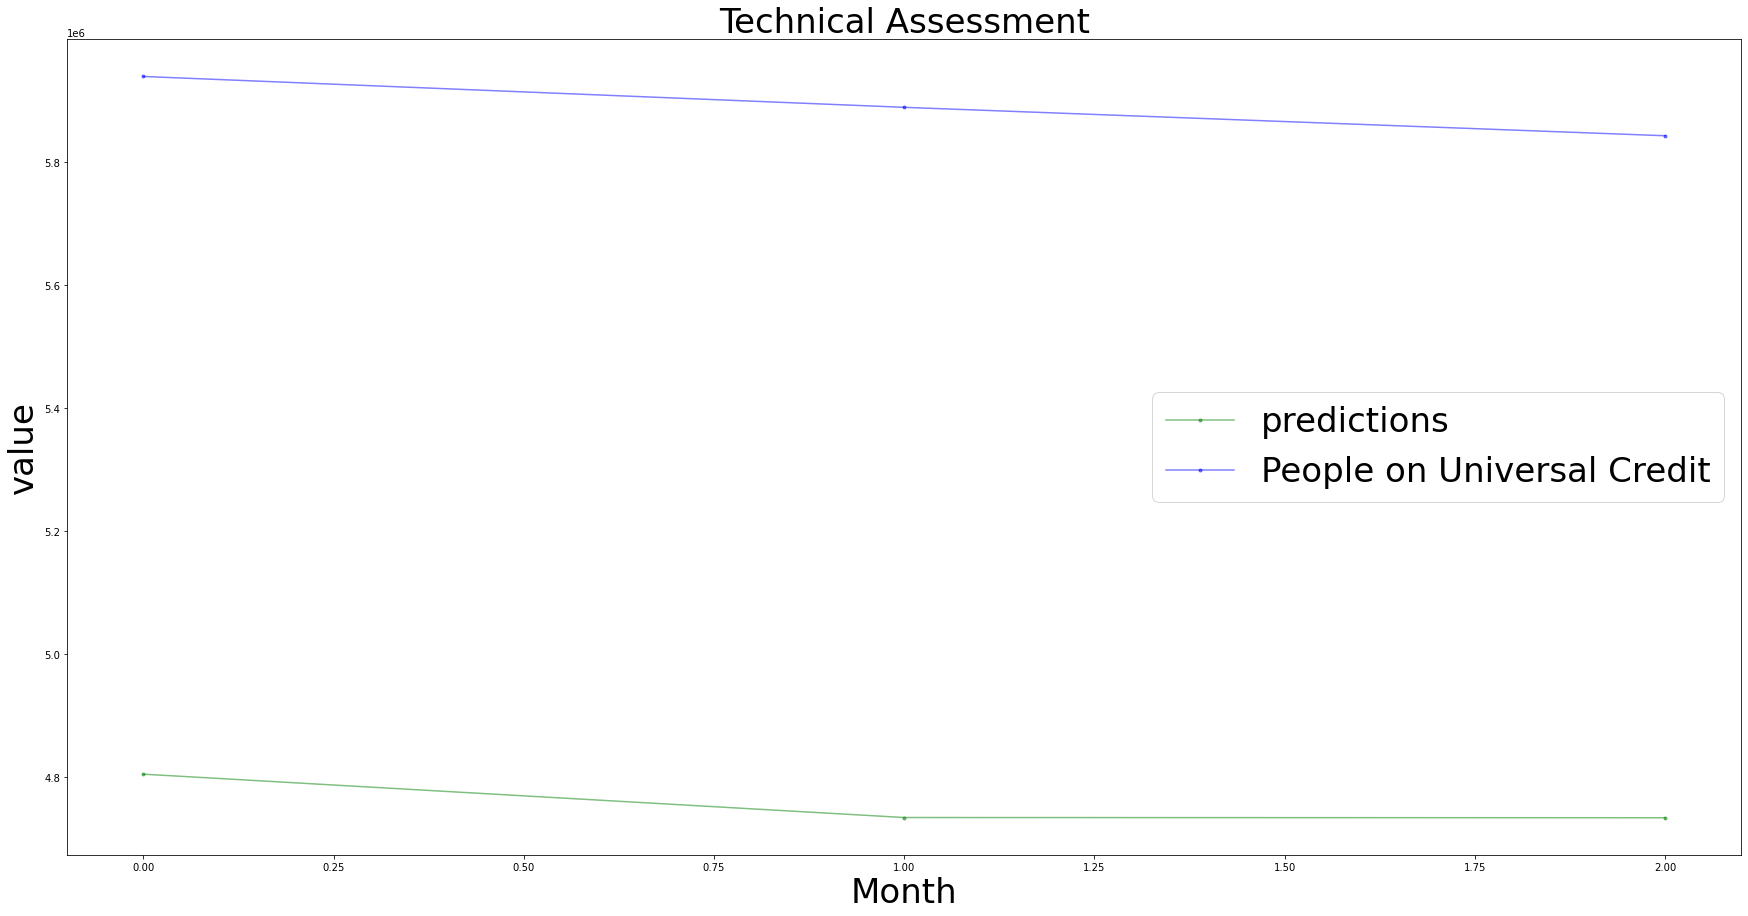

In [22]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['People on Universal Credit'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('Month',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)